In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Data points vs individual models Actual vs Predicted (10 data points since 2021-01 ~ 2021-10)
actual_data = [6.3, 6.2, 6, 6.1, 5.8, 5.9, 5.4, 5.2, 4.8, 4.6]
sarimax_uni = [6.775312, 6.644461, 6.919715, 9.676339 , 9.258633, 8.612168, 8.348652, 7.867523, 7.631783, 7.384789] # Sarimax univariate model
sarimax_multi = [6.364103, 6.638206, 5.892228, 6.199483, 6.094671, 6.059492, 5.810848, 5.615436, 5.471225,  5.156890] # Sarimax multivariate model
lstm_uni = [6.182875156402588, 6.182097911834717, 6.194850921630859, 6.265069484710693, 6.262324810028076, 6.254237651824951, 6.249123573303223, 6.236805438995361, 6.230378150939941, 6.222021579742432]
lstm_multi = [9.769404411315918, 9.04421615600586, 8.673357009887695, 8.161656379699707, 8.164690017700195, 8.079378128051758, 8.019535064697266, 7.897236347198486, 7.7849626541137695, 7.637566089630127] # LSTM multivariate model
ls_ls = ["SARIMAX Univariate", "SARIMAX Multivariate", "LSTM Univariate", "LSTM Multivariate"]
model_ls = [sarimax_uni, sarimax_multi, lstm_uni, lstm_multi]
count = 0
for ls in model_ls:
  if len(ls) != 0 and len(ls) != 10:
    raise Exception(f"The length of {ls_ls[count]} is not 10!")
  count += 1

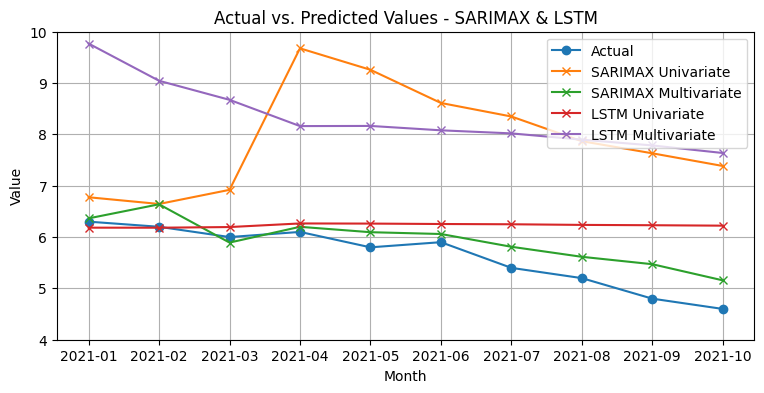

In [ ]:
# For the line plot of different models
indices = range(len(actual_data))
x_values = ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']
# Plot the actual values (y_test_unscaled) vs. predicted values (y_pred)
plt.figure(figsize=(9, 4))
plt.plot(x_values, actual_data, label='Actual', marker='o')
for ls_index in range(len(model_ls)):
  if len(model_ls[ls_index]) != 0:
    plt.plot(x_values, model_ls[ls_index], label=ls_ls[ls_index], marker='x')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values - SARIMAX & LSTM')
plt.legend()
plt.grid(True)
# plt.savefig("actualvspredicted.png")
# Set the y-axis limits
plt.ylim(4.0, 10.0)
plt.show()

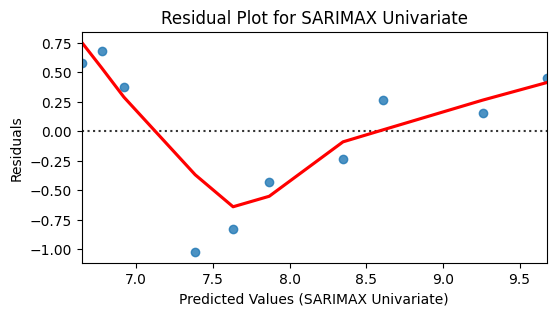

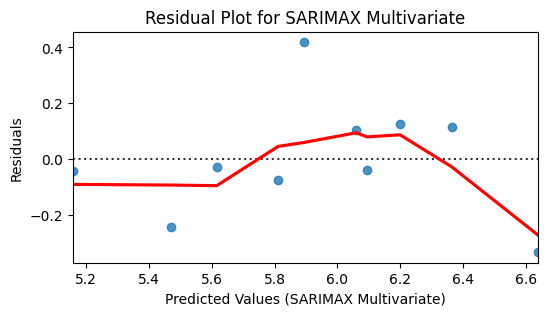

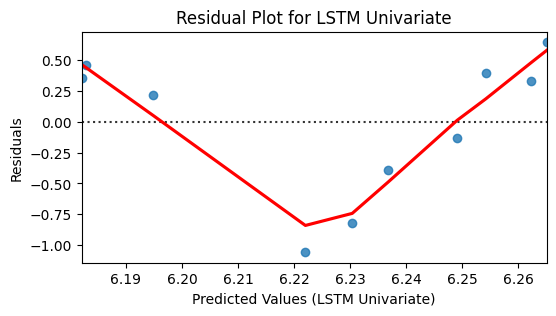

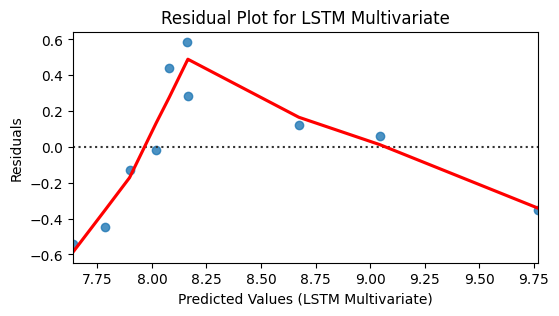

In [ ]:
# Residual Plots
residual_ls = []
for index in range(len(model_ls)):
  if len(model_ls[index]) != 0:
    residuals = [actual - predicted for actual, predicted in zip(actual_data, model_ls[index])]
    residual_ls.append(residuals)
    # Set figure size
    plt.figure(figsize=(6, 3))
    # Create the residual plot
    sns.residplot(x = model_ls[index], y = residuals, lowess = True, line_kws=dict(color="r"))
    plt.title(f"Residual Plot for {ls_ls[index]}")
    plt.xlabel(f"Predicted Values ({ls_ls[index]})")
    plt.ylabel('Residuals')
    plt.show()
residual_dict = dict(zip(ls_ls, residual_ls))# zip together for dictionary

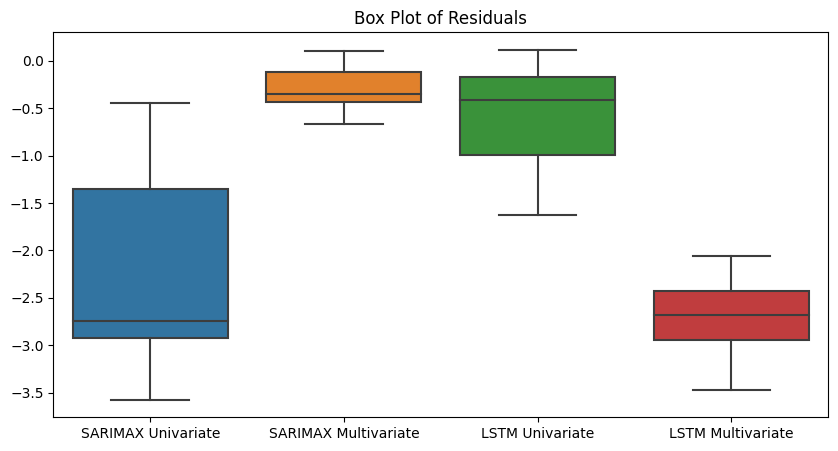

In [ ]:
# Convert the dictionary to a DataFrame
residual_df = pd.DataFrame(residual_dict)
plt.figure(figsize=(10, 5))

# Create a box plot with labels
ax = sns.boxplot(data=residual_df)
plt.title("Box Plot of Residuals")

# Create a legend
labels = [key for key in residual_dict.keys()]
ax.set_xticklabels(labels)  # Set labels on the x-axis
plt.show()

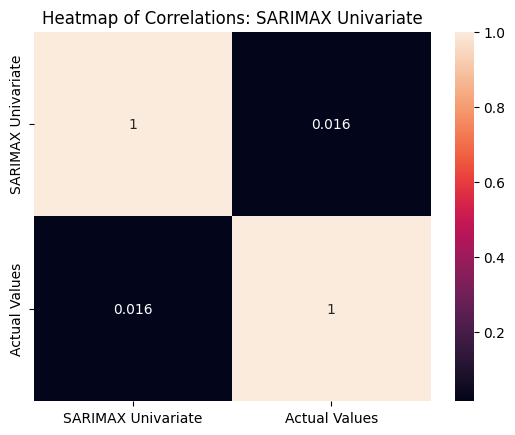

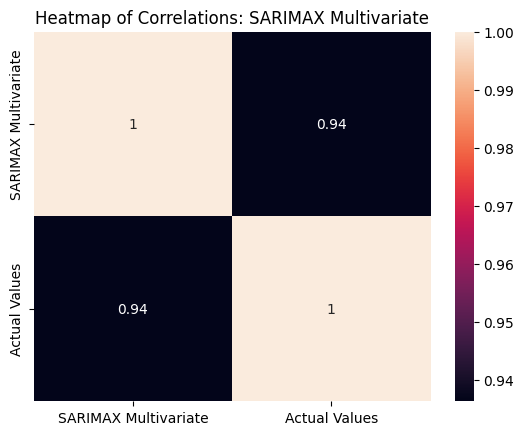

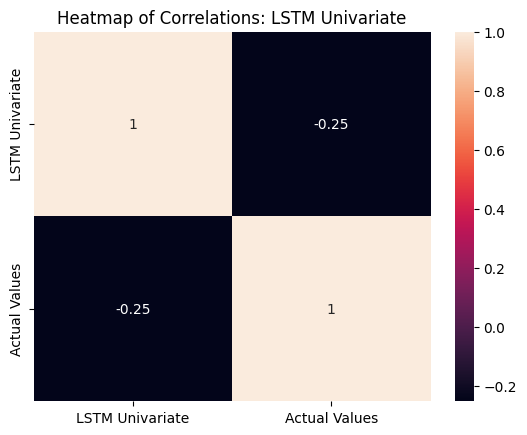

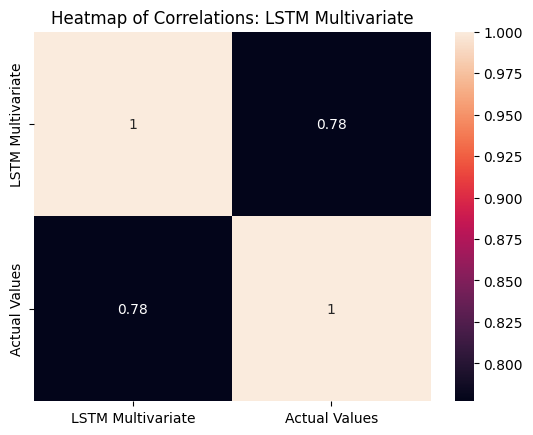

In [ ]:
# Heat Map of Correlation
dictionary = dict(zip(ls_ls, model_ls))
for key in dictionary.keys():
  data_dict = {} # Initialize data dict
  if len(dictionary[key]) == 10:
    data_dict[key] = dictionary[key]
    data_dict["Actual Values"] = actual_data
    # Plot Heatmap
    data = pd.DataFrame(data_dict)
    # Calculate Correlations
    correlation_matrix = data.corr()
    # Create heatmap of correlations
    sns.heatmap(correlation_matrix, annot = True) # Add cmap = 'coolwarm' for different color scheme
    plt.title(f"Heatmap of Correlations: {key}")
    plt.show()
